<a href="https://colab.research.google.com/github/EGKIP/Adaptive-traffic-signal-control/blob/Dev/V2I_CS_435.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving NGSIM_Peachtree_Vehicle_Trajectories.csv to NGSIM_Peachtree_Vehicle_Trajectories.csv
Saving NYC_CV_Pilot_IE_Processed_Data.csv to NYC_CV_Pilot_IE_Processed_Data.csv


In [ ]:
import pandas as pd

#Loading datasets
ngsim_df = pd.read_csv('NGSIM_Peachtree_Vehicle_Trajectories.csv')
nyc_cv_df = pd.read_csv('NYC_CV_Pilot_IE_Processed_Data.csv')

# A peek of the dataset used
ngsim_df.head()
nyc_cv_df.head()

<ipython-input-2-7b7c0f1fb983>:5: DtypeWarning: Columns (7,20) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc_cv_df = pd.read_csv('NYC_CV_Pilot_IE_Processed_Data.csv')


,eventid,LocationSource,Version,Active,Sent,Heard,HostVehID,TargetID,SeqNumHV,SeqNumTV,...,HeightLimit,SizeLimit,ExcessiveSpeed,ExcessiveSpeedTime,ExcessiveZoneSpeed,ExcessiveZoneSpeedTime,ExperimentGroup,WarningStartTime,Xdeg,Ydeg
0,14469336-48b7-408b-802d-505c1c771609,gps,ASD-SW_v4.3.5,0,1,0,4941E4FD,54ED4909,197,199,...,NaN,NaN,NaN,NaN,NaN,NaN,treatment,0.2,0.000362,0.000453
1,b5445236-94ef-41cf-b159-a2e9f1ffe761,gps,ASD-SW_v4.3.5,0,1,0,3BE4BBDE,FE4C3971,137,138,...,NaN,NaN,NaN,NaN,NaN,NaN,treatment,0.0,0.000935,0.000750
2,317adab3-f35e-4446-9bed-65e5a5657bb1,gps,ASD-SW_v4.3.5,1,1,0,9CA449DA,33E7BBCE,121,16384,...,NaN,NaN,NaN,NaN,NaN,NaN,treatment,0.0,0.001125,0.000772
3,17481055-886e-4f04-8a75-0c1a04edf46e,gps,ASD-SW_v4.3.3.0,0,1,0,8743FD8B,1E129BEE,94,95,...,NaN,NaN,NaN,NaN,NaN,NaN,treatment,0.1,0.001273,0.001600
4,002fc04e-fe50-4aff-8b6c-7bd69a90c078,gps,ASD-SW_v4.3.5,0,1,0,168C8351,4F94378B,137,138,...,NaN,NaN,NaN,NaN,NaN,NaN,treatment,0.1,0.000036,0.002617


In [ ]:
# Missing values row
ngsim_df_clean = ngsim_df.dropna()

# Sort
ngsim_df_clean = ngsim_df_clean.sort_values(by=['Vehicle_ID', 'Frame_ID'])

# Display data stats
ngsim_df_clean.describe()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,O_Zone,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway
count,873887.000000,873887.000000,873887.000000,8.738870e+05,873887.000000,873887.000000,8.738870e+05,8.738870e+05,873887.000000,873887.000000,...,873887.000000,873887.000000,873887.000000,873887.000000,873887.000000,873887.000000,873887.000000,873887.000000,873887.000000,873887.000000
mean,757.193637,4985.495780,1129.338836,1.163524e+09,0.567732,971.539681,2.230675e+06,1.376479e+06,16.531181,6.924743,...,110.231296,210.252374,0.640417,2.348027,2.919424,1.089604,473.065166,484.055230,79.307446,964.151317
std,458.987934,2597.073868,485.429089,2.595997e+05,17.686074,648.270491,1.355524e+02,6.172059e+02,2.843867,0.321936,...,8.551443,7.657361,1.412770,1.710425,1.027795,0.353378,508.800080,515.641788,180.883999,2905.865900
min,2.000000,2.000000,2.000000,1.163019e+09,-325.625000,0.000000,2.230210e+06,1.375533e+06,3.500000,5.000000,...,0.000000,201.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,352.000000,2794.000000,844.000000,1.163305e+09,-14.149000,333.577000,2.230537e+06,1.375873e+06,15.500000,6.800000,...,101.000000,201.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,742.000000,4994.000000,1191.000000,1.163523e+09,2.930000,861.913000,2.230627e+06,1.376392e+06,16.000000,7.000000,...,114.000000,214.000000,0.000000,2.000000,2.000000,1.000000,266.000000,296.000000,23.380000,2.250000
75%,1152.000000,7194.000000,1494.000000,1.163745e+09,15.330000,1577.315000,2.230820e+06,1.377046e+06,16.500000,7.000000,...,115.000000,214.000000,0.000000,4.000000,4.000000,1.000000,938.000000,958.000000,58.310000,17.400000
max,1810.000000,10329.000000,2418.000000,1.164063e+09,160.884000,2113.030000,2.230972e+06,1.377573e+06,42.600000,8.500000,...,123.000000,223.000000,5.000000,6.000000,4.000000,3.000000,1809.000000,1810.000000,1855.750000,31864.080000


In [ ]:
# Define queued and slowing down status
ngsim_df_clean['is_queued'] = ngsim_df_clean['v_Vel'] <= 2.0  # Fully stopped
ngsim_df_clean['is_slowing'] = (ngsim_df_clean['v_Vel'] > 2.0) & (ngsim_df_clean['v_Vel'] <= 6.0)  # Slowing down

In [ ]:
# Group by Frame_ID and extract key features
state_vectors = ngsim_df_clean.groupby('Frame_ID').agg({
    'Vehicle_ID': 'count',            # Total vehicles in frame
    'is_queued': 'sum',               # Count of fully stopped vehicles
    'is_slowing': 'sum',              # Count of slowing down vehicles
    'v_Vel': 'mean'                   # Avg speed
}).rename(columns={
    'Vehicle_ID': 'Vehicle_Count',
    'is_queued': 'Queued_Vehicle_Count',
    'is_slowing': 'Slowing_Vehicle_Count',
    'v_Vel': 'Average_Speed'
}).reset_index()

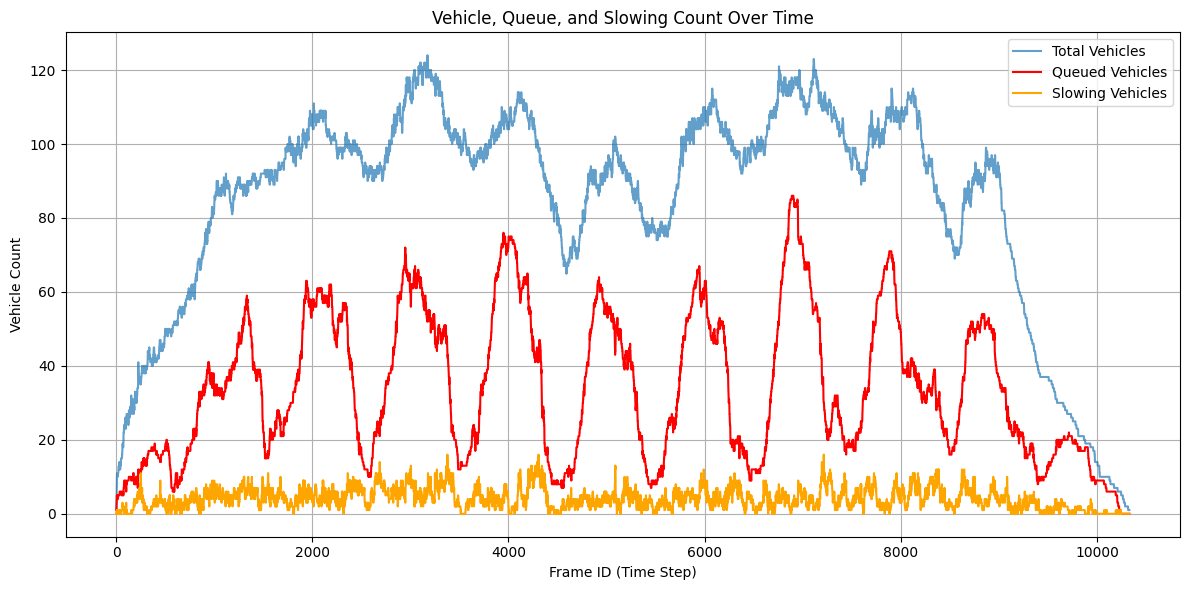

In [ ]:
import matplotlib.pyplot as plt

# Plot queue, slowing, and total vehicle counts
plt.figure(figsize=(12, 6))

# Total vehicles
plt.plot(state_vectors['Frame_ID'], state_vectors['Vehicle_Count'], label='Total Vehicles', alpha=0.7)

# Queued vehicles
plt.plot(state_vectors['Frame_ID'], state_vectors['Queued_Vehicle_Count'], label='Queued Vehicles', color='red')

# Slowing vehicles
plt.plot(state_vectors['Frame_ID'], state_vectors['Slowing_Vehicle_Count'], label='Slowing Vehicles', color='orange')

plt.xlabel("Frame ID (Time Step)")
plt.ylabel("Vehicle Count")
plt.title("Vehicle, Queue, and Slowing Count Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ******** NYC CV Pilot Dataset Preprocessing ********

In [ ]:
# First we check what columns we are working with
nyc_cv_df.columns

Index(['eventid', 'LocationSource', 'Version', 'Active', 'Sent', 'Heard',
       'HostVehID', 'TargetID', 'SeqNumHV', 'SeqNumTV', 'WarningType', 'ROI',
       'TimeRecBefore', 'TimeRecordFollow', 'DataResolution',
       'minSpdThreshold', 'TTC', 'GrpID', 'EventStatus', 'TimeBin',
       'LocationBin', 'WeatherCond', 'AirTempurature', 'Precipitation1hr',
       'WindSpeed', 'VolpeID', 'dummytime', 'X', 'Y', 'ExcessiveCurveSpeed',
       'ExcessiveCurveSpeedTime', 'minCurveSpeed', 'HeightLimit', 'SizeLimit',
       'ExcessiveSpeed', 'ExcessiveSpeedTime', 'ExcessiveZoneSpeed',
       'ExcessiveZoneSpeedTime', 'ExperimentGroup', 'WarningStartTime', 'Xdeg',
       'Ydeg'],
      dtype='object')

In [ ]:
# We make a copy of the dataset
nyc_cv_clean = nyc_cv_df.copy()

# Then convert 'dummytime' column to datetime
nyc_cv_clean['dummytime'] = pd.to_datetime(nyc_cv_clean['dummytime'], format="%d/%m/%Y %I:%M:%S %p", errors='coerce')

# Drop rows where conversion failed
nyc_cv_clean = nyc_cv_clean.dropna(subset=['dummytime'])

# Replace nulls in ExcessiveSpeed with 0 - if needed
nyc_cv_clean['ExcessiveSpeed'] = pd.to_numeric(nyc_cv_clean['ExcessiveSpeed'], errors='coerce').fillna(0)

# Grouping to state vector
nyc_cv_state = nyc_cv_clean.groupby('dummytime').agg({
    'eventid': 'count',
    'ExcessiveSpeed': 'sum',
    'X': 'mean',
    'Y': 'mean'
}).rename(columns={
    'eventid': 'Event_Count',
    'ExcessiveSpeed': 'Excessive_Speed_Count',
    'X': 'Mean_X_Location',
    'Y': 'Mean_Y_Location'
}).reset_index()



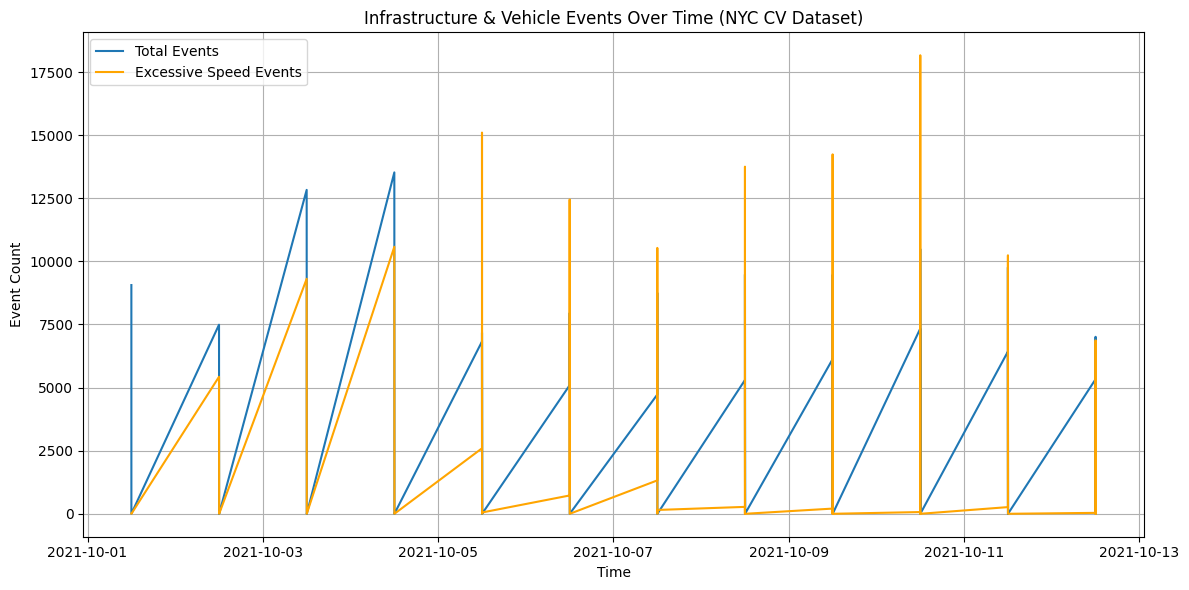

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(nyc_cv_state['dummytime'], nyc_cv_state['Event_Count'], label='Total Events')
plt.plot(nyc_cv_state['dummytime'], nyc_cv_state['Excessive_Speed_Count'], label='Excessive Speed Events', color='orange')
plt.xlabel("Time")
plt.ylabel("Event Count")
plt.title("Infrastructure & Vehicle Events Over Time (NYC CV Dataset)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
!apt-get install -y sumo sumo-tools sumo-doc


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  binfmt-support fastjar fonts-roboto-unhinted jarwrapper javascript-common
  libcoin80c libcollada-dom2.5-dp0 libfox-1.6-0 libgdal30 libglu1-mesa
  libjs-openlayers liblua5.2-0 libopenscenegraph161 libopenthreads21
  libpoppler-glib8 libproj22 proj-bin
Suggested packages:
  apache2 | lighttpd | httpd libopenal0a libsimage-dev libbullet2
The following NEW packages will be installed:
  binfmt-support fastjar fonts-roboto-unhinted jarwrapper javascript-common
  libcoin80c libcollada-dom2.5-dp0 libfox-1.6-0 libgdal30 libglu1-mesa
  libjs-openlayers liblua5.2-0 libopenscenegraph161 libopenthreads21
  libpoppler-glib8 libproj22 proj-bin sumo sumo-doc sumo-tools
0 upgraded, 20 newly installed, 0 to remove and 0 not upgraded.
Need to get 52.8 MB of archives.
After this operation, 270 MB of additional disk space will be used.
Get:1 http://archive

In [ ]:
import os
os.environ["SUMO_HOME"] = "/usr/share/sumo"

!netgenerate --grid --grid.number=2 --default-junction-type=traffic_light -o simple_intersection.net.xml


Success.


In [ ]:
!ls -l simple_intersection.net.xml


-rw-r--r-- 1 root root 7706 Apr 23 18:51 simple_intersection.net.xml


In [ ]:
# Basic route file with two directions of traffic flow
with open("route.rou.xml", "w") as f:
    f.write("""<routes>
    <!-- Define a vehicle type with standard car properties -->
    <vType id="car" accel="1.0" decel="5.0" sigma="0.5" length="5" maxSpeed="13.9"/>

    <!-- Define two simple routes across the grid -->
    <route id="horizontal" edges="2to1 1to0"/>
    <route id="vertical" edges="2to5 5to8"/>

    <!-- Generate a flow of vehicles for each route (600 vehicles per hour) -->
    <flow id="flow_h" type="car" route="horizontal" begin="0" end="3600" vehsPerHour="600"/>
    <flow id="flow_v" type="car" route="vertical" begin="0" end="3600" vehsPerHour="600"/>
</routes>""")


In [ ]:
# SUMO configuration file
with open("simple.sumocfg", "w") as f:
    f.write("""<configuration>
    <input>
        <!-- Network and route files -->
        <net-file value="simple_intersection.net.xml"/>
        <route-files value="route.rou.xml"/>
    </input>
    <time>
        <!-- Simulate 1 hour -->
        <begin value="0"/>
        <end value="3600"/>
    </time>
</configuration>""")


In [ ]:
!ls -l *.xml *.sumocfg


-rw-r--r-- 1 root root  579 Apr 23 18:51 route.rou.xml
-rw-r--r-- 1 root root 7706 Apr 23 18:51 simple_intersection.net.xml
-rw-r--r-- 1 root root  310 Apr 23 18:51 simple.sumocfg


In [ ]:
import os
import sys
import xml.etree.ElementTree as ET

#SUMO's installation directory
os.environ["SUMO_HOME"] = "/usr/share/sumo"
sys.path.append(os.path.join(os.environ["SUMO_HOME"], "tools"))

tree = ET.parse("simple_intersection.net.xml")
root = tree.getroot()

print("Edge IDs found in the network:")
for edge in root.findall('edge'):
    edge_id = edge.get('id')
    if not edge_id.startswith(":"):
        print(edge_id)


Edge IDs found in the network:
A0A1
A0B0
A1A0
A1B1
B0A0
B0B1
B1A1
B1B0


In [ ]:
with open("route.rou.xml", "w") as f:
    f.write("""<routes>
    <!-- Define car type -->
    <vType id="car" accel="1.0" decel="5.0" sigma="0.5" length="5" maxSpeed="13.9"/>

    <!-- Horizontal route: A1 to A0 to B0 -->
    <route id="horizontal" edges="A1A0 A0B0"/>

    <!-- Vertical route: A0 to B0 to B1 -->
    <route id="vertical" edges="A0B0 B0B1"/>

    <!-- 600 cars/hour on each route -->
    <flow id="flow_h" type="car" route="horizontal" begin="0" end="3600" vehsPerHour="600"/>
    <flow id="flow_v" type="car" route="vertical" begin="0" end="3600" vehsPerHour="600"/>
</routes>""")

In [ ]:
!sumo -c simple.sumocfg


Step #3600.00 (0ms ?*RT. ?UPS, vehicles TOT 941 ACT 6 BUF 259)                            


In [ ]:
# Pointing to SUMO tools to use TraCI from Python
import os
import sys
os.environ["SUMO_HOME"] = "/usr/share/sumo"
sys.path.append(os.path.join(os.environ["SUMO_HOME"], "tools"))

import traci
import traci.constants as tc

import numpy as np
import matplotlib.pyplot as plt


 Retrying in 1 seconds


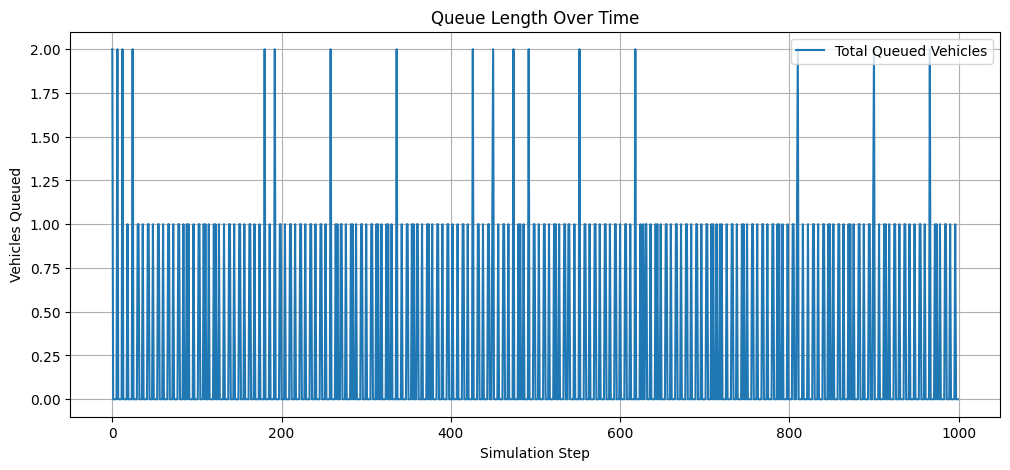

In [ ]:
# Loading SUMO network and starting simulation from config
sumo_cmd = ["sumo", "-c", "simple.sumocfg"]
traci.start(sumo_cmd)

# Step through simulation and monitor traffic light + vehicles
step = 0
max_steps = 1000

queue_lengths = []


while step < max_steps:
    traci.simulationStep()

    # Geting current phase of the traffic light
    tls_id = traci.trafficlight.getIDList()[0]
    current_phase = traci.trafficlight.getPhase(tls_id)

    # (speed <= 0.1 m/s) on each lane
    total_queue = 0
    for lane_id in traci.lane.getIDList():
        vehicles = traci.lane.getLastStepVehicleIDs(lane_id)
        for v in vehicles:
            speed = traci.vehicle.getSpeed(v)
            if speed <= 0.1:
                total_queue += 1


    queue_lengths.append(total_queue)

    step += 1

# Stoping simulation when done
traci.close()

# Plotting total queue length over time
plt.figure(figsize=(12, 5))
plt.plot(queue_lengths, label='Total Queued Vehicles')
plt.title("Queue Length Over Time")
plt.xlabel("Simulation Step")
plt.ylabel("Vehicles Queued")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
!pip install gym==0.25.2
!pip install stable-baselines3==1.8.0 --no-deps

#dependencies SB3 needs
!pip install torch cloudpickle numpy


  Using cached stable_baselines3-1.8.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 3.4 MB/s eta 0:00:00


In [ ]:
import traci
if traci.isLoaded():
    traci.close()


In [ ]:
import traci
traci.start(["sumo", "-c", "simple.sumocfg"])
print("Traffic Light IDs:", traci.trafficlight.getIDList())
traci.close()


 Retrying in 1 seconds
Traffic Light IDs: ('A0', 'A1', 'B0', 'B1')


In [ ]:
import gym
from gym import spaces
import numpy as np
import traci
import os
import random

class SumoTrafficEnv(gym.Env):
    def __init__(self, max_steps=1000):
        super(SumoTrafficEnv, self).__init__()

        # Starting up SUMO config
        self.sumo_cfg = "simple.sumocfg"
        self.max_steps = max_steps
        self.step_count = 0

        self.tls_id = "A0"

        # Defining action space: 0 = keep phase, 1 = switch to next
        self.action_space = spaces.Discrete(2)

        # Defining observation space: [queue_count, slowing_count]
        self.observation_space = spaces.Box(
            low=np.array([0, 0]),
            high=np.array([1000, 1000]),
            dtype=np.float32
        )

    def reset(self):
        # Reconnecting to SUMO
        if traci.isLoaded():
            traci.close()
        traci.start(["sumo", "-c", self.sumo_cfg])
        self.step_count = 0
        return self.get_state()

    def step(self, action):

        self.step_count += 1

        # Switching traffic light phase if action is 1
        if action == 1:
            current_phase = traci.trafficlight.getPhase(self.tls_id)
            num_phases = len(traci.trafficlight.getAllProgramLogics(self.tls_id)[0].phases)
            traci.trafficlight.setPhase(
                self.tls_id,
                (current_phase + 1) % num_phases
            )

        # Advancing simulation
        traci.simulationStep()

        # Pointing to new state + reward
        next_state = self.get_state()
        reward = self.compute_reward(next_state)
        done = self.step_count >= self.max_steps

        return next_state, reward, done, {}

    def get_state(self):
        # Counting vehicles: queued and slowing
        queue = 0
        slowing = 0
        for lane in traci.lane.getIDList():
            for v in traci.lane.getLastStepVehicleIDs(lane):
                speed = traci.vehicle.getSpeed(v)
                if speed <= 2.0:
                    queue += 1
                elif speed <= 6.0:
                    slowing += 1
        return np.array([float(queue), float(slowing)], dtype=np.float32)

    def compute_reward(self, state):
        queue, slowing = state
        return - (queue + 0.5 * slowing)  # Penalize queues more

    def render(self, mode='human'):
        pass

    def close(self):
        traci.close()


In [ ]:
from stable_baselines3 import DQN

# Creating a fresh instance of our SUMO traffic environment
env = SumoTrafficEnv()

# Instantiating the DQN agent with default MLP policy
model = DQN(
    policy="MlpPolicy",
    env=env,                     # Plugging in our SUMO environment
    learning_rate=1e-3,  # Learning rate for optimizer
    buffer_size=10000,
    learning_starts=100,
    batch_size=32,               # Mini-batch size for training
    gamma=0.99,
    train_freq=1,
    target_update_interval=100,
    verbose=1                    # Print training logs
)

#Training the model for 10,000 steps
model.learn(total_timesteps=10000)


/usr/local/lib/python3.11/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1e+03    |
|    ep_rew_mean      | -2152.75 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 15       |
|    time_elapsed     | 264      |
|    total_timesteps  | 4000     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.685    |
|    n_updates        | 3899     |
----------------------------------
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
------------------------------------
| rollout/            |            |
|    ep_len_mean      | 1e+03      |
|    ep_rew_mean      | -2181.0625 |
|    exploration_rate | 0.

In [ ]:
# Saving the trained DQN model
model.save("dqn_sumo_model")


In [ ]:
# Resetting the environment
obs = env.reset()
done = False
step_count = 0

# Creating logs to store reward and queue state
rewards = []
queues = []

# Looping through the environment until the episode ends
while not done:
    # Predicting the next action using the trained agent
    action, _ = model.predict(obs)

    # Stepping the simulation using the chosen action
    obs, reward, done, _ = env.step(action)

    # Logging the reward and the queue count at this step
    rewards.append(reward)
    queues.append(obs[0])

    print(f"Step {step_count}: Action={action}, Reward={reward}, Queue={obs[0]}, Slowing={obs[1]}")
    step_count += 1

# Closing the SUMO simulation session
env.close()


 Retrying in 1 seconds
Step 0: Action=1, Reward=-2.0, Queue=2.0, Slowing=0.0
Step 1: Action=1, Reward=-2.0, Queue=2.0, Slowing=0.0
Step 2: Action=1, Reward=-2.0, Queue=2.0, Slowing=0.0
Step 3: Action=1, Reward=-1.0, Queue=0.0, Slowing=2.0
Step 4: Action=1, Reward=-1.0, Queue=0.0, Slowing=2.0
Step 5: Action=1, Reward=-1.0, Queue=0.0, Slowing=2.0
Step 6: Action=1, Reward=-3.0, Queue=2.0, Slowing=2.0
Step 7: Action=1, Reward=-3.0, Queue=2.0, Slowing=2.0
Step 8: Action=1, Reward=-2.5, Queue=2.0, Slowing=1.0
Step 9: Action=1, Reward=-1.0, Queue=0.0, Slowing=2.0
Step 10: Action=1, Reward=-1.0, Queue=0.0, Slowing=2.0
Step 11: Action=1, Reward=-1.0, Queue=0.0, Slowing=2.0
Step 12: Action=1, Reward=-3.0, Queue=2.0, Slowing=2.0
Step 13: Action=1, Reward=-3.0, Queue=2.0, Slowing=2.0
Step 14: Action=1, Reward=-2.5, Queue=2.0, Slowing=1.0
Step 15: Action=1, Reward=-1.0, Queue=0.0, Slowing=2.0
Step 16: Action=1, Reward=-1.5, Queue=0.0, Slowing=3.0
Step 17: Action=1, Reward=-2.0, Queue=0.0, Slowing=4

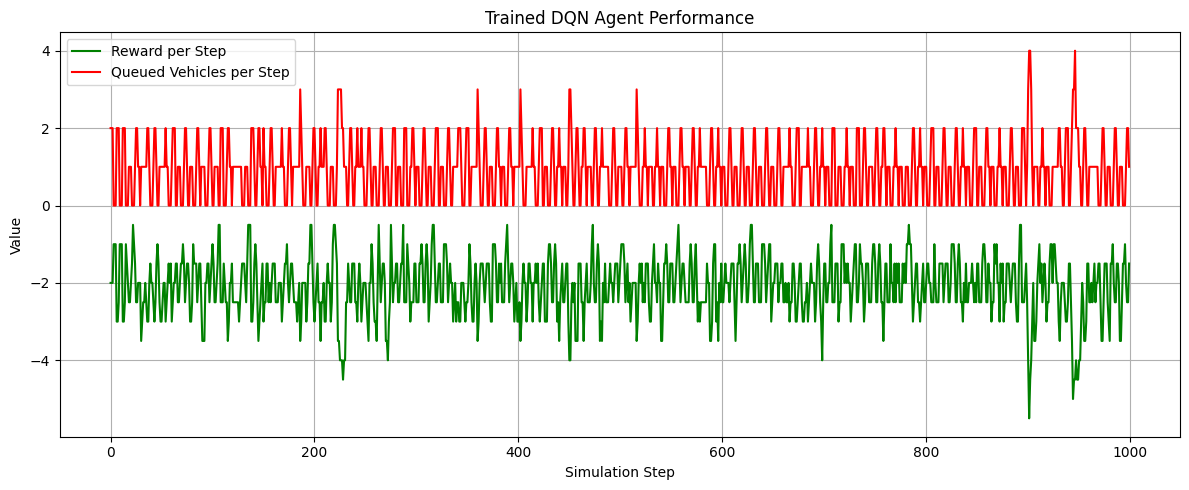

In [ ]:
import matplotlib.pyplot as plt

# Plotting the reward and queue length per simulation step
plt.figure(figsize=(12, 5))

# Plotting reward trend
plt.plot(rewards, label='Reward per Step', color='green')

# Plotting queue count trend
plt.plot(queues, label='Queued Vehicles per Step', color='red')

plt.title("Trained DQN Agent Performance")
plt.xlabel("Simulation Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import traci
import matplotlib.pyplot as plt
import numpy as np

# Defining a fixed-time traffic light controller class
class FixedTrafficLightController:
    def __init__(self, sumo_cfg, max_steps=1000, switch_interval=20):
        self.sumo_cfg = sumo_cfg
        self.max_steps = max_steps
        self.switch_interval = switch_interval
        self.tls_id = "A0"
        self.queue_log = []
        self.reward_log = []

    def run(self):
        # Starting the SUMO simulation with the configuration file
        traci.start(["sumo", "-c", self.sumo_cfg])
        current_phase = 0

        for step in range(self.max_steps):
            # Switching the phase every N steps based on interval
            if step % self.switch_interval == 0:
                num_phases = len(traci.trafficlight.getAllProgramLogics(self.tls_id)[0].phases)
                current_phase = (current_phase + 1) % num_phases
                traci.trafficlight.setPhase(self.tls_id, current_phase)

            # Stepping the simulation forward
            traci.simulationStep()

            # Measuring queueing and slowing vehicles for reward calculation
            queue = 0
            slowing = 0
            for lane in traci.lane.getIDList():
                for v in traci.lane.getLastStepVehicleIDs(lane):
                    speed = traci.vehicle.getSpeed(v)
                    if speed <= 2.0:
                        queue += 1
                    elif speed <= 6.0:
                        slowing += 1

            reward = - (queue + 0.5 * slowing)

            # Logging queue and reward values
            self.queue_log.append(queue)
            self.reward_log.append(reward)

        # Closing the SUMO simulation
        traci.close()

    def plot_results(self):
        # Creating the performance plot
        plt.figure(figsize=(14, 6))

        # Plotting reward values over time
        plt.plot(self.reward_log, label="Reward per Step (Fixed)", color="blue")

        # Plotting queued vehicle counts over time
        plt.plot(self.queue_log, label="Queued Vehicles per Step (Fixed)", color="orange")

        # Adding labels and styling the plot
        plt.title("Fixed-Time Traffic Controller Performance")
        plt.xlabel("Simulation Step")
        plt.ylabel("Value")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


 Retrying in 1 seconds


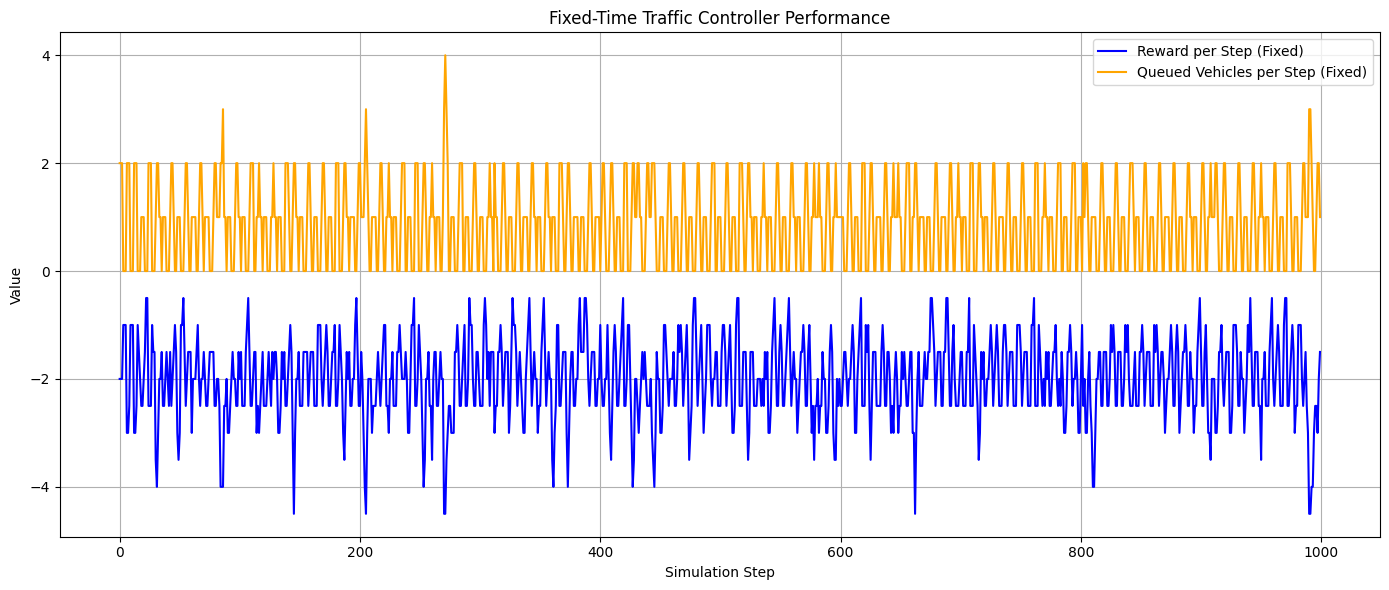

In [ ]:
# Creating an instance of the fixed controller
fixed_controller = FixedTrafficLightController(sumo_cfg="simple.sumocfg", max_steps=1000, switch_interval=20)

# Running the fixed policy simulation
fixed_controller.run()

# Plotting the results
fixed_controller.plot_results()


In [ ]:
# Evaluating the trained DQN model
from stable_baselines3.common.vec_env import DummyVecEnv

# Recreating a fresh evaluation environment
eval_env = DummyVecEnv([lambda: SumoTrafficEnv()])

# Initializing logs
model_rewards = []
model_queue = []

# Resetting environment
obs = eval_env.reset()
done = False
step = 0

# Evaluating for 1000 steps
while step < 1000:
    # Predicting best action from trained model
    action, _ = model.predict(obs, deterministic=True)

    # Taking action in the environment
    obs, reward, done, info = eval_env.step(action)

    model_rewards.append(reward[0])
    model_queue.append(obs[0][0])  # Queued vehicles from observation

    step += 1

# Closing the evaluation environment
eval_env.close()


/usr/local/lib/python3.11/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


 Retrying in 1 seconds
 Retrying in 1 seconds


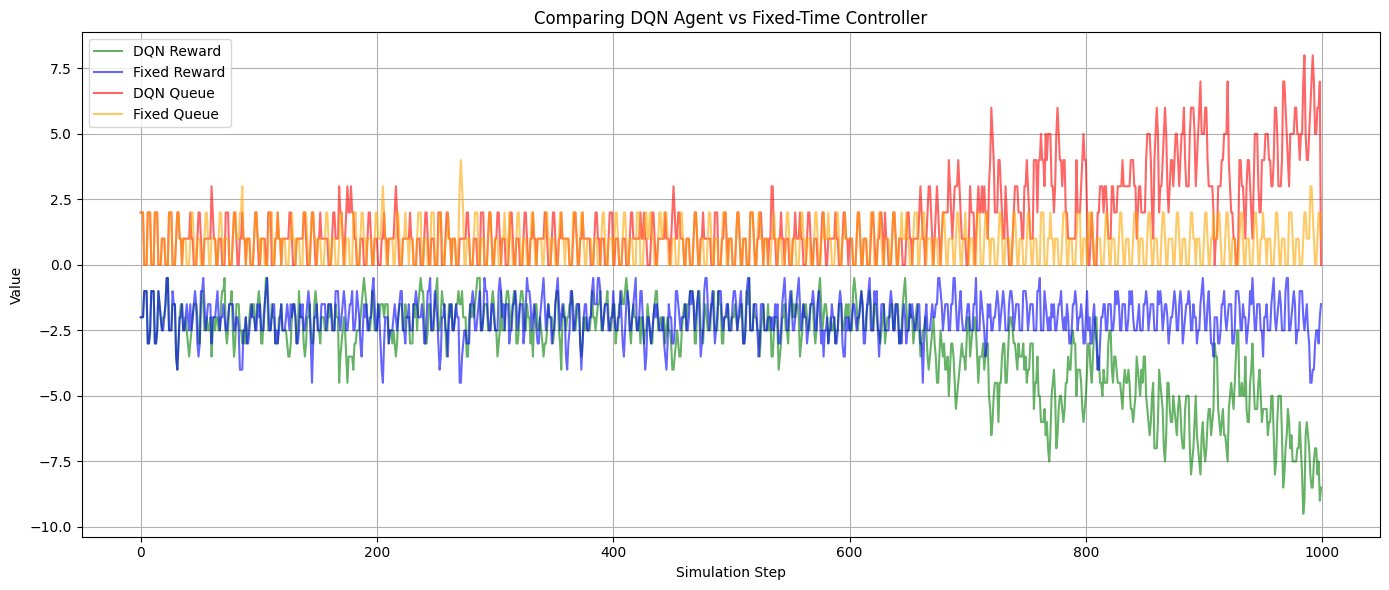

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(model_rewards, label="DQN Reward", color="green", alpha=0.6)
plt.plot(fixed_controller.reward_log, label="Fixed Reward", color="blue", alpha=0.6)
plt.plot(model_queue, label="DQN Queue", color="red", alpha=0.6)
plt.plot(fixed_controller.queue_log, label="Fixed Queue", color="orange", alpha=0.6)
plt.title("Comparing DQN Agent vs Fixed-Time Controller")
plt.xlabel("Simulation Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
def run_experiment(config_name, learning_rate, gamma, batch_size):
    print(f"\nRunning config: {config_name}")

    # New environment for each experiment
    env = DummyVecEnv([lambda: SumoTrafficEnv()])

    model = DQN(
        policy="MlpPolicy",
        env=env,
        learning_rate=learning_rate,
        buffer_size=10000,
        learning_starts=100,
        batch_size=batch_size,
        gamma=gamma,
        train_freq=1,
        target_update_interval=100,
        verbose=0
    )

    # Training the model for 10,000 steps
    model.learn(total_timesteps=10000)

    obs = env.reset()
    rewards, queues = [], []
    for _ in range(1000):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _ = env.step(action)
        rewards.append(reward[0])
        queues.append(obs[0][0])

    return {
        "config": config_name,
        "rewards": rewards,
        "queues": queues,
        "avg_reward": np.mean(rewards),
        "avg_queue": np.mean(queues)
    }


In [ ]:
#Experiments with different hyperparameter combinations
results = []

results.append(run_experiment("Baseline", learning_rate=1e-3, gamma=0.99, batch_size=32))
results.append(run_experiment("Lower LR, Higher Gamma", learning_rate=5e-4, gamma=0.995, batch_size=32))
results.append(run_experiment("Larger Batch", learning_rate=1e-3, gamma=0.99, batch_size=64))



Running config: Baseline
 Retrying in 1 seconds


/usr/local/lib/python3.11/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds

Running config: Lower LR, Higher Gamma
 Retrying in 1 seconds


/usr/local/lib/python3.11/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds

Running config: Larger Batch
 Retrying in 1 seconds


/usr/local/lib/python3.11/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds
 Retrying in 1 seconds


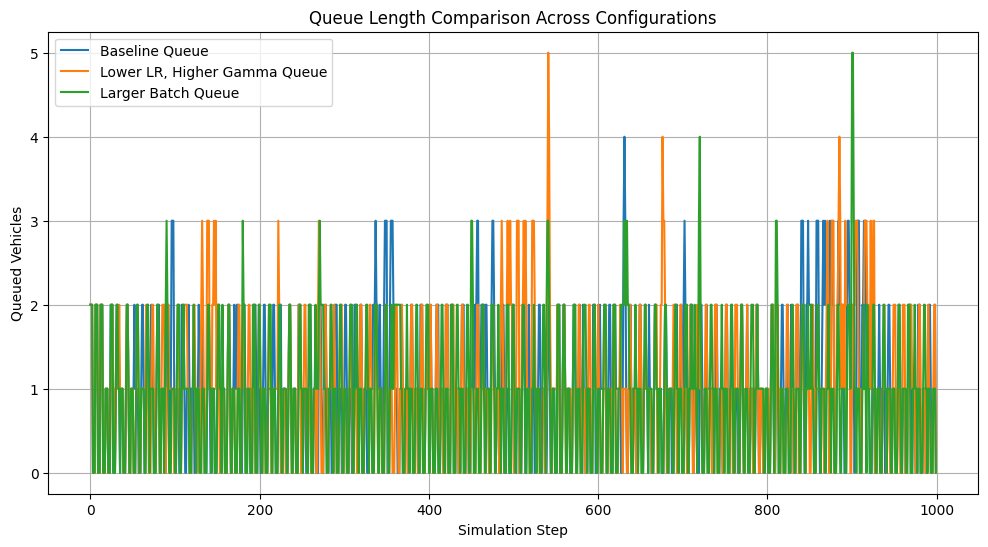

Baseline → Avg Reward: -2.18, Avg Queue: 0.96
Lower LR, Higher Gamma → Avg Reward: -2.21, Avg Queue: 0.97
Larger Batch → Avg Reward: -2.04, Avg Queue: 0.89


In [ ]:
#queued vehicle count over time for each configuration graph
plt.figure(figsize=(12, 6))
for result in results:
    plt.plot(result["queues"], label=f"{result['config']} Queue")
plt.title("Queue Length Comparison Across Configurations")
plt.xlabel("Simulation Step")
plt.ylabel("Queued Vehicles")
plt.legend()
plt.grid(True)
plt.show()

#summary of each configuration
for result in results:
    print(f"{result['config']} → Avg Reward: {result['avg_reward']:.2f}, Avg Queue: {result['avg_queue']:.2f}")
